# TFM Banco Checo

In [1]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cargamos los datos que hemos procesado en R
df= pd.read_csv("C://Master Data Science/Master en Data Science/TFM/Transacciones de Banco Checo/DFTenenciaProductos.csv")

In [ ]:
df.head(10)

In [4]:
#Tomamos un primer subconjunto de variables de prueba
df1=df[['frequency', 'sex_owner','sex_disponent', 'Ord_Insurance','Ord_Insurance_amount','Ord_Household_Payment',
        'Ord_Household_Payment_amount','Ord_Loan_Payment','Ord_Loan_Payment_amount','Ord_Leasing','Ord_Leasing_amount',
        'Ord_Empty','Ord_Empty_amount']] 

In [5]:
df1.head()

,frequency,sex_owner,sex_disponent,Ord_Insurance,Ord_Insurance_amount,Ord_Household_Payment,Ord_Household_Payment_amount,Ord_Loan_Payment,Ord_Loan_Payment_amount,Ord_Leasing,Ord_Leasing_amount,Ord_Empty,Ord_Empty_amount
0,Monthly,M,NaN,0,0,1,6646,0,0.0,1,586.0,0,0
1,Monthly,F,NaN,0,0,1,1933,0,0.0,0,0.0,0,0
2,Monthly,F,NaN,1,528,1,236,1,4882.5,0,0.0,1,11766
3,Monthly,F,NaN,0,0,1,2111,0,0.0,0,0.0,2,15
4,Monthly,F,NaN,0,0,1,2865,0,0.0,0,0.0,0,0


In [6]:
df2=pd.get_dummies(df1)

In [59]:
df2.loc[10,:]

Ord_Insurance                      0.0
Ord_Insurance_amount               0.0
Ord_Household_Payment              1.0
Ord_Household_Payment_amount    3172.0
Ord_Loan_Payment                   0.0
Ord_Loan_Payment_amount            0.0
Ord_Leasing                        0.0
Ord_Leasing_amount                 0.0
Ord_Empty                          0.0
Ord_Empty_amount                   0.0
frequency_After_trans              0.0
frequency_Monthly                  1.0
frequency_Weekly                   0.0
sex_owner_F                        1.0
sex_owner_M                        0.0
sex_disponent_F                    0.0
sex_disponent_M                    1.0
Name: 10, dtype: float64

In [8]:
df2.columns.values.tolist()

['Ord_Insurance',
 'Ord_Insurance_amount',
 'Ord_Household_Payment',
 'Ord_Household_Payment_amount',
 'Ord_Loan_Payment',
 'Ord_Loan_Payment_amount',
 'Ord_Leasing',
 'Ord_Leasing_amount',
 'Ord_Empty',
 'Ord_Empty_amount',
 'frequency_After_trans',
 'frequency_Monthly',
 'frequency_Weekly',
 'sex_owner_F',
 'sex_owner_M',
 'sex_disponent_F',
 'sex_disponent_M']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# from imblearn.over_sampling import SMOTE

In [ ]:
# conda install -c glemaitre imbalanced-learn

In [10]:
#Empezamos a probar con un subconjunto de variables
X = df2

In [11]:
y = df["account_loan_bin"] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
os = SMOTE(random_state=0)
columns = X_train.columns
os_X,os_y=os.fit_sample(X_train, y_train)
os_X = pd.DataFrame(data=os_X,columns=columns )
os_y= pd.DataFrame(data=os_y,columns=['account_loan_bin'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_X))
print("Number of loans=0 in oversampled data",len(os_y[os_y['account_loan_bin']==0]))
print("Number of loans=1",len(os_y[os_y['account_loan_bin']==1]))
print("Proportion of loans=0 is ",len(os_y[os_y['account_loan_bin']==0])/len(os_X))
print("Proportion of loans=1 is ",len(os_y[os_y['account_loan_bin']==1])/len(os_X))

In [13]:
clf=LogisticRegression()

In [14]:
clf.fit(X_train,y_train)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
h=pd.DataFrame(clf.predict(X_train))

In [40]:
accuracy_score(y_test,clf.predict(X_test))


0.9911111111111112

In [43]:
sum(y_test),sum(clf.predict(X_test))

(143, 151)

In [45]:
precision_score(y_test,clf.predict(X_test))

0.9470198675496688

In [46]:
classification_report(y_test,clf.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       757\n           1       0.95      1.00      0.97       143\n\n   micro avg       0.99      0.99      0.99       900\n   macro avg       0.97      0.99      0.98       900\nweighted avg       0.99      0.99      0.99       900\n'

In [69]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

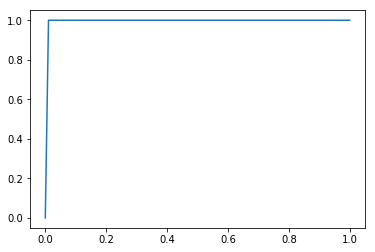

In [51]:
from sklearn.metrics import roc_curve, auc
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf.predict(X_test))
plt.plot(fp,tp)

In [52]:
auc(fp,tp)


0.9947159841479524

In [63]:
df2.iloc[10,:]

Ord_Insurance                      0.0
Ord_Insurance_amount               0.0
Ord_Household_Payment              1.0
Ord_Household_Payment_amount    3172.0
Ord_Loan_Payment                   0.0
Ord_Loan_Payment_amount            0.0
Ord_Leasing                        0.0
Ord_Leasing_amount                 0.0
Ord_Empty                          0.0
Ord_Empty_amount                   0.0
frequency_After_trans              0.0
frequency_Monthly                  1.0
frequency_Weekly                   0.0
sex_owner_F                        1.0
sex_owner_M                        0.0
sex_disponent_F                    0.0
sex_disponent_M                    1.0
Name: 10, dtype: float64

In [62]:
print(clf.predict(df2.iloc[10,:]))
print(clf.predict_proba(df2.iloc[10,:]))

ValueError: Expected 2D array, got 1D array instead:
array=[0.000e+00 0.000e+00 1.000e+00 3.172e+03 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 1.000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Vamos a probar con un arbol de decisión 

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
clf_tree = DecisionTreeClassifier(max_depth=4)


In [99]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
accuracy_score(y_test,clf_tree.predict(X_test))

0.9888888888888889

In [101]:
sum(clf_tree.predict(X_test))

149

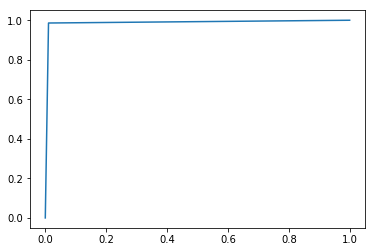

In [102]:
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf_tree.predict(X_test))
plt.plot(fp,tp)

In [103]:
auc(fp,tp)

0.9877229771549454

In [104]:
#Vamos a ver cómo cambian los datos con CV
from sklearn.model_selection import cross_val_score


In [105]:
cross_val_score(clf,X,y,cv=5,scoring="accuracy")

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.99667037, 0.98446171, 0.99111111, 0.98887653, 0.99332592])

In [106]:
cross_val_score(clf_tree,X,y,cv=5,scoring="accuracy")

array([0.99556049, 0.98446171, 0.99111111, 0.99332592, 0.99332592])

Vamos a probar con K-Neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier 

In [114]:
clf_knei = KNeighborsClassifier(n_neighbors=3) 

In [115]:
clf_knei.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [116]:
accuracy_score(y_test,clf_knei.predict(X_test))

0.9777777777777777

# Vamos a probar el Random Forest

In [131]:
# Load the library
from sklearn.ensemble import RandomForestClassifier
# Create an instance
clf_RF = RandomForestClassifier(max_depth=10)
# Fit the data
clf_RF.fit(X_train, y_train)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
accuracy_score(y_test,clf_RF.predict(X_test))

0.9877777777777778

In [ ]:
# Vamos a probar el Gradient Boosted

In [141]:
# Load the library
from sklearn.ensemble import GradientBoostingClassifier
# Create an instance
clf_GB = GradientBoostingClassifier(max_depth=3)
# Fit the data
clf_GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [142]:
accuracy_score(y_test,clf_RF.predict(X_test))

0.9877777777777778

In [ ]:
from sklearn.model_selection import GridSearchCV
reg_test = GridSearchCV(KNeighborsRegressor(),
                       param_grid={"n_neighbors":np.arange(3,50)})
# Fit will test all of the combinations
reg_test.fit(X,y)